In [4]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/python_machine_learning_basics/CART_RandomForest


In [5]:
# Read and select variables
columns = ['id',
           'bfs_name',
           'bfs_number',
           'lat',
           'lon',
           'brand',
           'pop',
           'pop_dens',
           'frg_pct',
           'emp',
          ]
df_supermarkets_orig = pd.read_csv("./Data/supermarkets_data_enriched.csv", 
                                   sep=",", 
                                   encoding="utf-8")[columns]

# Number of rows and columns
print(df_supermarkets_orig.shape)

# Brand to upper case letters
df_supermarkets_orig['brand'] = df_supermarkets_orig['brand'].str.upper()

# First records
df_supermarkets_orig.head(5)

# Count missing values
print(df_supermarkets_orig.isna().sum())

# Remove missing values
df_supermarkets = df_supermarkets_orig.dropna()
df_supermarkets

(3242, 10)
id               0
bfs_name         0
bfs_number       0
lat              0
lon              0
brand         1233
pop              0
pop_dens         0
frg_pct          0
emp             45
dtype: int64


,id,bfs_name,bfs_number,lat,lon,brand,pop,pop_dens,frg_pct,emp
0,33126515,Schänis,3315,47.155616,9.037915,SPAR,3876,97.142857,13.054696,1408.0
1,280130028,Schänis,3315,47.155492,9.039666,ALDI,3876,97.142857,13.054696,1408.0
2,6122906632,Schänis,3315,47.158959,9.044477,DENNER,3876,97.142857,13.054696,1408.0
3,9019298862,Schänis,3315,47.155185,9.038472,LIDL,3876,97.142857,13.054696,1408.0
4,36726161,Uznach,3339,47.226191,8.980329,MIGROS,6489,860.610080,27.862537,3500.0
...,...,...,...,...,...,...,...,...,...,...
3230,9584570723,Seedorf (UR),1214,46.881529,8.615975,VOLG,2051,106.379668,6.972209,703.0
3231,9593770082,Bäretswil,111,47.339296,8.839173,VOLG,5053,227.715187,10.152385,1647.0
3233,9624205242,Buch am Irchel,24,47.549645,8.618709,VOLG,979,95.886386,7.252298,200.0
3238,9950926547,Marbach (SG),3253,47.392404,9.569855,VOLG,2110,481.735160,18.578199,678.0


### 1. Modell-Training und Interpretation

**Aufgabe 1**: Trainiere ein lineares Regressionsmodell auf einem Datensatz, der den Preis von Wohnungen in Abhängigkeit von der Fläche und der Bevölkerungsdichte vorhersagen soll. 

- a) Führe das Modelltraining durch und zeige den Output der Regressionsergebnisse an.
- b) Interpretiere das R² und das Adjusted R² im Kontext des Modells.
- c) Wenn der Wert für die Fläche (z.B., `area`) 100 Quadratmeter und die Bevölkerungsdichte (z.B., `pop_dens`) 2000 beträgt, wie hoch wäre der geschätzte Preis? Verwende dabei die Koeffizienten aus deinem Modell.

**Lösungshilfe**:
\[
\text{Preis} = \text{const} + (\text{coef}_{\text{area}} \times 100) + (\text{coef}_{\text{pop\_dens}} \times 2000)
\]

**Hinweis**: Achte darauf, den Einfluss von `R²` und `Adjusted R²` für die Modellgüte zu erklären.

In [6]:
import statsmodels.api as sm
# Erstelle einen Beispiel-Datensatz mit Variablen 'area' und 'pop_dens' als Prädiktoren und 'price' als Zielvariable
import pandas as pd
import numpy as np

np.random.seed(42)
df = pd.DataFrame({
    'area': np.random.uniform(20, 200, 100),  # Wohnfläche in Quadratmetern
    'pop_dens': np.random.uniform(100, 3000, 100),  # Bevölkerungsdichte
    'price': np.random.uniform(100000, 500000, 100)  # Preis
})

# Prädiktoren und Zielvariable festlegen
X = df[['area', 'pop_dens']]  # Annahme: df ist der Datensatz
y = df['price']

# Konstante zur Matrix X hinzufügen (für den Interzept/const)
X = sm.add_constant(X)

# Modell trainieren
model = sm.OLS(y, X).fit()

# Regressionsergebnisse anzeigen
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.154
Date:                Sun, 10 Nov 2024   Prob (F-statistic):              0.320
Time:                        22:06:30   Log-Likelihood:                -1307.5
No. Observations:                 100   AIC:                             2621.
Df Residuals:                      97   BIC:                             2629.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.483e+05    3.4e+04     10.231      0.0

Hier ist eine detaillierte Interpretation der OLS-Regressionsergebnisse, die du in eine Markdown-Zelle einfügen kannst:

---

### Interpretation der OLS-Regressionsergebnisse

Die Regression wurde durchgeführt, um den **Preis von Wohnungen** (`price`) basierend auf der **Fläche** (`area`) und der **Bevölkerungsdichte** (`pop_dens`) zu modellieren. Hier ist die Interpretation der wichtigen Kennzahlen:

#### Modellgütemaße
- **R-squared (R²)**: Der R²-Wert beträgt 0.023, was bedeutet, dass nur etwa 2.3% der Varianz des Wohnungspreises durch die Prädiktoren `area` und `pop_dens` erklärt werden. Das Modell hat daher eine sehr geringe Erklärungskraft.
  
- **Adjusted R-squared**: Der Adjusted R²-Wert beträgt 0.003. Er berücksichtigt die Anzahl der Prädiktoren und zeigt, dass das Modell keine signifikante Erklärungskraft für den Wohnungspreis bietet.

#### Koeffizienten
Die Tabelle der Koeffizienten zeigt die Einflussgrößen der Prädiktoren auf den Wohnungspreis:

1. **const (Intercept)**: Der Interzept beträgt 348300 (3.483e+05). Das bedeutet, dass bei einem Wert von Null für alle Prädiktoren (`area` und `pop_dens`) der erwartete Preis etwa 348300 beträgt. Dieser Wert allein ist jedoch in der Praxis oft schwer zu interpretieren, da eine Wohnung mit 0 Quadratmetern Fläche und einer Bevölkerungsdichte von 0 in der Realität keinen Sinn ergibt.

2. **area (Fläche)**: Der Koeffizient für `area` beträgt -93.56, was bedeutet, dass mit jedem zusätzlichen Quadratmeter Fläche der Preis um etwa 93.56 Einheiten **sinkt**. Dieser negative Wert ist überraschend, da man normalerweise erwartet, dass größere Wohnungen teurer sind. Dies könnte auf **Multikollinearität** oder **unerwartete Korrelationen** hinweisen.

3. **pop_dens (Bevölkerungsdichte)**: Der Koeffizient für `pop_dens` beträgt -20.41, was bedeutet, dass der Preis um etwa 20.41 Einheiten sinkt, wenn die Bevölkerungsdichte um eine Einheit steigt. Auch dieser negative Wert ist untypisch, da Wohnungen in dichter besiedelten Gebieten oft teurer sind. Dieser Wert könnte ebenfalls auf **Multikollinearität** oder **Probleme im Modell** hinweisen.

#### Signifikanztests (P>|t|)
- Der p-Wert für `const` ist 0.000, was darauf hinweist, dass der Interzept auf einem signifikanten Niveau von 0.05 signifikant ist.
- Die p-Werte für `area` und `pop_dens` betragen 0.672 bzw. 0.144, was bedeutet, dass keiner dieser Prädiktoren auf einem Niveau von 0.05 signifikant ist. Dies legt nahe, dass **weder die Fläche noch die Bevölkerungsdichte einen signifikanten Einfluss auf den Preis haben**.

#### Modellgütekriterien
- **AIC (Akaike Information Criterion)**: Der AIC-Wert beträgt 2621. Ein niedrigerer AIC-Wert deutet auf ein besser angepasstes Modell hin. Hier ist der Wert relativ hoch, was auf eine schlechte Modellanpassung hindeutet.
  
- **BIC (Bayesian Information Criterion)**: Der BIC-Wert beträgt 2629. Ein niedrigerer BIC-Wert wäre besser, um Modelle zu vergleichen. Auch dieser Wert ist relativ hoch und bestätigt die schlechte Anpassung des Modells.

#### Anmerkungen zur Modellqualität
- **Multikollinearität**: Der Hinweis im Modelloutput über den hohen `Condition Number` (5.12e+03) deutet darauf hin, dass möglicherweise eine starke Multikollinearität oder andere numerische Probleme im Modell vorliegen. Dies kann die Zuverlässigkeit der Koeffizienten und der p-Werte beeinträchtigen und führt dazu, dass das Modell möglicherweise nicht stabil ist.

#### Zusammenfassung
Insgesamt zeigt das Modell:
- Eine **sehr geringe Erklärungskraft** für die Variabilität des Wohnungspreises (niedriges R²).
- Keine der erklärenden Variablen (`area` und `pop_dens`) ist statistisch signifikant.
- Hinweise auf **Multikollinearität** und **mögliche Modellprobleme**.

Das Modell sollte überarbeitet werden, möglicherweise durch Hinzufügen oder Entfernen von Prädiktoren, um die Vorhersagekraft und Stabilität zu verbessern.

### b) Interpretation von R² und Adjusted R² im Kontext des Modells

Um die Erklärungskraft des Modells zu verstehen, betrachten wir die Werte für R² und Adjusted R². 

- **R²** gibt den Anteil der Varianz des Wohnungspreises an, der durch die Prädiktoren (hier `area` und `pop_dens`) erklärt wird. Wenn z. B. R² = 0.023 ist, bedeutet das, dass nur 2.3% der Variabilität der Wohnungspreise durch das Modell erklärt werden. Dies ist ein sehr niedriger Wert und zeigt, dass das Modell die Wohnungspreise nicht gut vorhersagen kann.
  
- **Adjusted R²** ist eine angepasste Version von R², die die Anzahl der Prädiktoren berücksichtigt und Strafen für unnötige Komplexität verhängt. In diesem Fall, wenn Adjusted R² ebenfalls sehr niedrig ist (z. B. 0.003), bedeutet das, dass das Hinzufügen weiterer Prädiktoren die Modellgüte nicht verbessert. Dies deutet darauf hin, dass das Modell nur wenig Erklärungskraft besitzt.

Insgesamt sind niedrige Werte für R² und Adjusted R² ein Hinweis darauf, dass die Variablen `area` und `pop_dens` die Preise von Wohnungen nur unzureichend erklären und möglicherweise zusätzliche oder andere Prädiktoren benötigt werden, um die Modellanpassung zu verbessern.

### c) Berechnung des geschätzten Preises für `area` = 100 und `pop_dens` = 2000

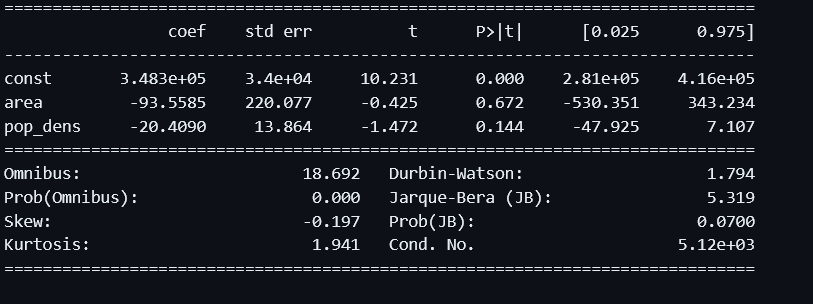

Um den geschätzten Preis zu berechnen, setzen wir die Werte für `area` und `pop_dens` in die Regressionsgleichung ein:
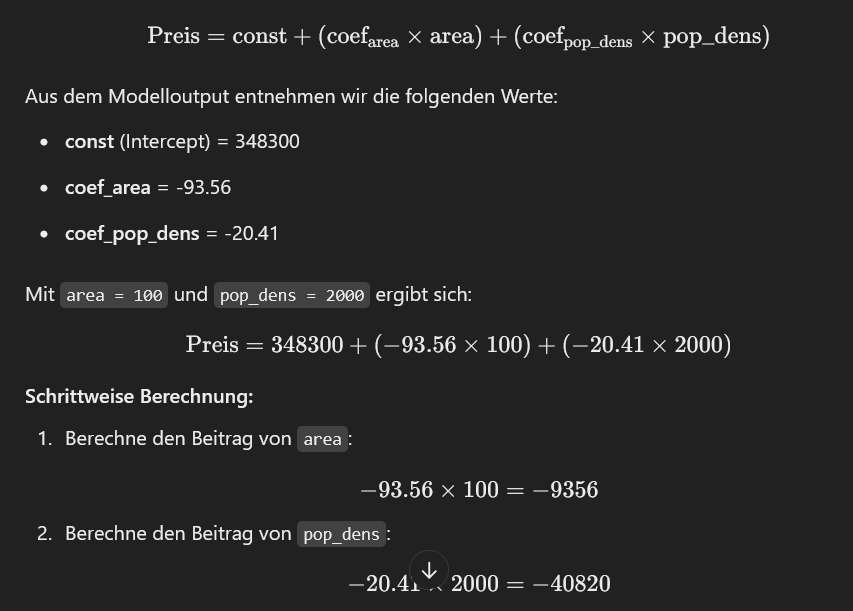
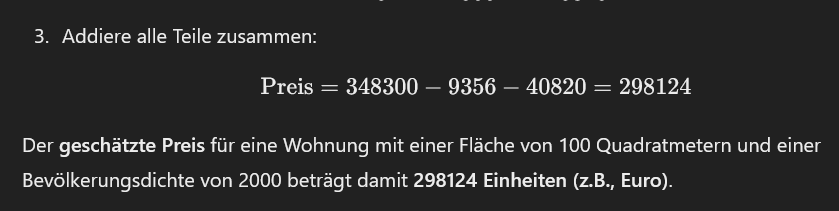


### 2. Modellgütemaße und Koeffizienten

**Aufgabe 2**: Du hast einen Regressionsoutput mit folgenden Daten:
- `const = 150`, `area = 20`, `pop_dens = 0.1`
- `R² = 0.6`, `Adjusted R² = 0.58`

- **a) Was bedeutet das R² von 0.6 in diesem Zusammenhang?**
    - *R² (Bestimmtheitsmaß) von 0.6 bedeutet, dass 60% der Varianz in der Zielvariable (vermutlich der Preis) durch die erklärenden Variablen area und pop_dens erklärt werden. Das zeigt, dass das Modell eine moderate bis gute Erklärungskraft hat. Ein R²-Wert von 0.6 deutet darauf hin, dass 40% der Varianz noch durch andere Faktoren erklärt werden, die in diesem Modell nicht berücksichtigt wurden.*
- **b) Interpretiere den `const`-Koeffizienten: Was bedeutet es, wenn alle erklärenden Variablen den Wert Null haben?**
    - *Der const-Koeffizient (Intercept) von 150 gibt den geschätzten Preis an, wenn alle erklärenden Variablen (area und pop_dens) den Wert Null haben. In diesem Kontext bedeutet dies, dass der Preis für eine Wohnung (theoretisch) 150 Einheiten beträgt, wenn die Fläche und die Bevölkerungsdichte beide null sind.*

    - *Da eine Fläche von 0 Quadratmetern und eine Bevölkerungsdichte von 0 in der Realität keinen Sinn ergeben, ist der konstante Term oft eher ein theoretischer Wert als eine praktische Vorhersage. Er zeigt den Basiswert der Zielvariable an und hilft bei der Berechnung des Preises für beliebige Kombinationen der erklärenden Variablen.*

- c) **Wie würde sich der geschätzte Preis ändern, wenn die Fläche von 50 Quadratmetern auf 100 Quadratmeter ansteigt, bei gleichbleibender Bevölkerungsdichte?**
    - *Um den Einfluss einer Änderung der Fläche von 50 Quadratmetern auf 100 Quadratmeter zu berechnen, verwenden wir den Koeffizienten für area:*

        - *Der Koeffizient für area beträgt 20, was bedeutet, dass sich der Preis um 20 Einheiten erhöht, wenn die Fläche um einen Quadratmeter zunimmt.*

        - *Die Änderung in der Fläche beträgt: 100−50=50 Quadratmeter*

        *Daher ist die geschätzte Änderung im Preis = 20×50=1000*

    - *Der geschätzte Preis würde also um 1000 Einheiten steigen, wenn die Fläche von 50 Quadratmetern auf 100 Quadratmeter zunimmt, bei gleichbleibender Bevölkerungsdichte.*

### 3. Residuen-Analyse und Histogramm

**Aufgabe 3**: Fitte ein Regressionsmodell und erstelle anschließend ein Histogramm der Residuen.

- a) Fitte ein Modell auf einem Datensatz deiner Wahl.
- b) Berechne die Residuen des Modells.
- c) Erstelle ein Histogramm der Residuen und interpretiere das Ergebnis. Sind die Residuen symmetrisch verteilt? Falls nicht, was könnte das bedeuten?

**Hinweis**: Residuenanalyse hilft zu verstehen, ob die Annahmen der linearen Regression (z.B., Normalverteilung der Fehler) erfüllt sind.

                            OLS Regression Results                            
Dep. Variable:                    pop   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.135e+05
Date:                Sun, 10 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:06:31   Log-Likelihood:                -20864.
No. Observations:                1979   AIC:                         4.173e+04
Df Residuals:                    1976   BIC:                         4.175e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2865.6200    257.682     11.121      0.0

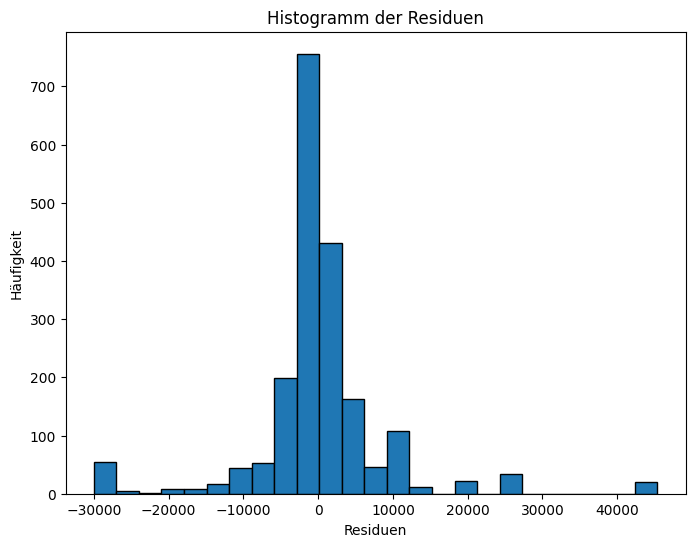

In [7]:
# Libraries (als Voraussetzung bereits geladen)
import statsmodels.api as sm

# Prädiktoren und Zielvariable festlegen
X = df_supermarkets[['pop_dens', 'emp']]  # Prädiktoren
y = df_supermarkets['pop']  # Zielvariable (angenommen, wir möchten Bevölkerung vorhersagen)

# Konstante zur Matrix X hinzufügen (für den Interzept/Intercept)
X = sm.add_constant(X)

# Modell fitten
model = sm.OLS(y, X).fit()

# Regressionsergebnisse anzeigen
print(model.summary())

# Berechnung der Residuen
residuals = model.resid

# Histogramm der Residuen erstellen
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=25, edgecolor='k')
plt.title('Histogramm der Residuen')
plt.xlabel('Residuen')
plt.ylabel('Häufigkeit')
plt.show()


Hier ist eine detaillierte Interpretation der OLS-Regressionsergebnisse und des Histogramms der Residuen.

---

### OLS-Regressionsergebnisse (Modellgüte und Koeffizienten)

1. **R-squared (R²)** und **Adjusted R-squared**: 
   - **R-squared (R²) = 0.991** und **Adjusted R-squared = 0.991**. Diese sehr hohen Werte (nahe 1) bedeuten, dass 99.1% der Varianz der Zielvariable `pop` (Bevölkerung) durch die Prädiktoren `pop_dens` (Bevölkerungsdichte) und `emp` (Anzahl der Angestellten) erklärt werden. Das Modell hat also eine extrem hohe Erklärungskraft.
   - Hohe Werte für R² und Adjusted R² deuten darauf hin, dass das Modell die Zielvariable sehr gut vorhersagen kann.

2. **F-statistic und Prob (F-statistic)**:
   - Die **F-statistic** beträgt 1.135e+05 und **Prob (F-statistic)** ist praktisch 0. Ein sehr kleiner p-Wert (< 0.05) für die F-Statistik zeigt, dass das Modell als Ganzes signifikant ist, d.h., die erklärenden Variablen haben gemeinsam einen signifikanten Einfluss auf die Zielvariable.

3. **Koeffizienten (coef)**:
   - **const (Intercept) = 2865.6200**: Dies ist der geschätzte Wert der Zielvariablen `pop`, wenn `pop_dens` und `emp` beide Null sind. Dies ist der Basiswert der Bevölkerung ohne Einfluss der erklärenden Variablen. In einem realen Kontext ist dieser Wert oft weniger relevant, da `pop_dens` und `emp` selten genau Null sind.
   - **pop_dens (Bevölkerungsdichte) = 2.9425**: Der Koeffizient zeigt, dass bei einer Erhöhung der Bevölkerungsdichte um eine Einheit die Zielvariable `pop` (Bevölkerung) im Durchschnitt um etwa 2.9425 Einheiten steigt, wenn alle anderen Variablen konstant gehalten werden.
   - **emp (Anzahl der Angestellten) = 0.8184**: Dieser Koeffizient zeigt, dass bei einer Erhöhung der Anzahl der Angestellten um eine Einheit die Bevölkerung `pop` im Durchschnitt um etwa 0.8184 Einheiten steigt, wenn die Bevölkerungsdichte konstant bleibt.

4. **p-Werte für die Koeffizienten (P>|t|)**:
   - Alle p-Werte der Koeffizienten sind extrem niedrig (< 0.05), was bedeutet, dass jeder Koeffizient statistisch signifikant ist. Das heißt, sowohl `pop_dens` als auch `emp` haben einen signifikanten Einfluss auf die Zielvariable `pop`.

5. **AIC und BIC**:
   - **AIC = 4.173e+04** und **BIC = 4.175e+04**. Diese Werte sind Modellgütemaße, die besonders nützlich sind, wenn man mehrere Modelle vergleicht. Niedrigere Werte deuten auf eine bessere Modellanpassung hin. Da wir hier nur ein Modell betrachten, dienen AIC und BIC hauptsächlich als Referenzpunkte.

6. **Diagnosemetriken**:
   - **Omnibus und Prob(Omnibus)**: Der Omnibus-Test (und der zugehörige p-Wert) prüft die Normalität der Residuen. Ein p-Wert von 0 bedeutet, dass die Residuen wahrscheinlich nicht normalverteilt sind, was eine Verletzung der Annahmen der linearen Regression sein kann.
   - **Jarque-Bera (JB)** und **Prob(JB)**: Auch dieser Test prüft die Normalverteilung der Residuen, und ein p-Wert von 0 deutet darauf hin, dass die Residuen nicht normalverteilt sind.
   - **Durbin-Watson**: Ein Wert von 0.155 weist auf Autokorrelation der Residuen hin, was ein Hinweis auf Abhängigkeiten zwischen den Residuen sein könnte. Werte nahe 2 sind ideal, ein Wert nahe 0 deutet auf eine starke positive Autokorrelation hin.
   - **Condition Number**: Der hohe Wert von 1.57e+05 weist auf Multikollinearität hin, was bedeutet, dass die Prädiktoren stark korreliert sein könnten. Multikollinearität kann die Stabilität der Koeffizientenschätzungen beeinträchtigen.


### Histogramm der Residuen

Das Histogramm der Residuen zeigt, wie die Fehler (Residuen) des Modells verteilt sind.

- **Symmetrie**: Das Histogramm weist eine leichte Symmetrie um den Nullpunkt auf, was auf eine einigermaßen normale Verteilung der Residuen hindeutet. Eine ideale Verteilung wäre jedoch noch symmetrischer und glockenförmig.
- **Verteilung und Ausreißer**: Einige Residuen liegen weit von Null entfernt (bis zu -30.000 und +40.000), was auf Ausreißer hinweist. Diese Ausreißer zeigen, dass das Modell einige Werte nicht gut erklären kann.
- **Nicht-normalverteilte Residuen**: Die Tests (Omnibus, Jarque-Bera) und das Histogramm deuten darauf hin, dass die Residuen nicht perfekt normalverteilt sind. Dies könnte die Annahmen der linearen Regression verletzen und darauf hinweisen, dass das Modell in bestimmten Bereichen (z. B. für extreme Werte) weniger zuverlässig ist.

### 4. Modellvergleich und AIC/BIC

**Aufgabe 4**: Du hast zwei Modelle, Modell A und Modell B, die beide auf denselben Datensatz gefittet wurden.

- Modell A: `AIC = 210`, `BIC = 220`
- Modell B: `AIC = 205`, `BIC = 215`

- a) **Welches Modell würdest du basierend auf AIC und BIC bevorzugen und warum?**
    - *Modell B sollte bevorzugt werden, weil es sowohl beim AIC (205) als auch beim BIC (215) niedrigere Werte hat als Modell A (AIC = 210 und BIC = 220).*
    - *Sowohl AIC (Akaike Information Criterion) als auch BIC (Bayesian Information Criterion) sind Kriterien zur Modellbewertung. Sie helfen dabei, Modelle zu vergleichen, indem sie sowohl die Anpassungsgüte als auch die Komplexität des Modells berücksichtigen.*
    - *Niedrigere AIC- und BIC-Werte deuten auf eine bessere Modellanpassung hin, da das Modell eine gute Erklärungskraft hat und gleichzeitig weniger komplex ist.*
    - *Da Modell B die niedrigeren AIC- und BIC-Werte aufweist, ist es das bevorzugte Modell. Es bietet eine bessere Balance zwischen Anpassungsgüte und Modellkomplexität.*

- b) **Warum sind AIC und BIC wichtig, wenn man verschiedene Modelle miteinander vergleicht?**
    - *AIC und BIC sind wichtig, weil sie eine Balance zwischen Anpassungsgüte und Einfachheit des Modells herstellen. Niedrigere Werte deuten darauf hin, dass das Modell die Zielvariable gut erklärt, ohne unnötig viele Variablen zu nutzen.*
    - *AIC und BIC messen die Modellgüte unter Berücksichtigung der Modellkomplexität, also der Anzahl der erklärenden Variablen. Modelle, die unnötig komplex sind (d.h. mehr Parameter enthalten), werden durch AIC und BIC bestraft.*

**Hinweis**: Denke daran, dass niedrigere Werte für AIC und BIC eine bessere Modellanpassung bei gleichzeitig geringerer Komplexität anzeigen.